In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
df = pd.read_csv("/content/drive/MyDrive/CsvFiles/austo_automobile.csv")

In [4]:
df.head()

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
0,53,Male,Business,Married,Post Graduate,4,No,No,Yes,99300,70700.0,170000,61000,SUV
1,53,Femal,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500,70300.0,165800,61000,SUV
2,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,97300,60700.0,158000,57000,SUV
3,53,Female,Salaried,Married,Graduate,2,Yes,No,Yes,72500,70300.0,142800,61000,SUV
4,53,Male,Salaried,Married,Post Graduate,3,No,No,Yes,79700,60200.0,139900,57000,SUV


In [5]:
df.tail()

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
1576,22,Male,Salaried,Single,Graduate,2,No,Yes,No,33300,0.0,33300,27000,Hatchback
1577,22,Male,Business,Married,Graduate,4,No,No,No,32000,NaN,32000,31000,Hatchback
1578,22,Male,Business,Single,Graduate,2,No,Yes,No,32900,0.0,32900,30000,Hatchback
1579,22,Male,Business,Married,Graduate,3,Yes,Yes,No,32200,NaN,32200,24000,Hatchback
1580,22,Male,Salaried,Married,Graduate,4,No,No,No,31600,0.0,31600,31000,Hatchback


In [6]:
df.shape

(1581, 14)

The dataset has 1581 rows and 14 columns

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1581 non-null   int64  
 1   Gender            1528 non-null   object 
 2   Profession        1581 non-null   object 
 3   Marital_status    1581 non-null   object 
 4   Education         1581 non-null   object 
 5   No_of_Dependents  1581 non-null   int64  
 6   Personal_loan     1581 non-null   object 
 7   House_loan        1581 non-null   object 
 8   Partner_working   1581 non-null   object 
 9   Salary            1581 non-null   int64  
 10  Partner_salary    1475 non-null   float64
 11  Total_salary      1581 non-null   int64  
 12  Price             1581 non-null   int64  
 13  Make              1581 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 173.1+ KB


- Since, Salary, Total Salary, Price are all of int64 type.So we can convert the Partner Salary which of float64 type to int64 type as well

In [9]:
categorical_cols = ['Gender', 'Profession', 'Marital_status','Education', 'Personal_loan', 'House_loan', 'Partner_working', 'Make']
for col in categorical_cols:
  print(df[col].value_counts(normalize=True)*100)
  print('-'*50)

Gender
Male      78.468586
Female    21.400524
Femal      0.065445
Femle      0.065445
Name: proportion, dtype: float64
--------------------------------------------------
Profession
Salaried    56.672992
Business    43.327008
Name: proportion, dtype: float64
--------------------------------------------------
Marital_status
Married    91.271347
Single      8.728653
Name: proportion, dtype: float64
--------------------------------------------------
Education
Post Graduate    62.30234
Graduate         37.69766
Name: proportion, dtype: float64
--------------------------------------------------
Personal_loan
Yes    50.094877
No     49.905123
Name: proportion, dtype: float64
--------------------------------------------------
House_loan
No     66.666667
Yes    33.333333
Name: proportion, dtype: float64
--------------------------------------------------
Partner_working
Yes    54.901961
No     45.098039
Name: proportion, dtype: float64
--------------------------------------------------
Make
Sed

- As the column ` Gender ` can have only 2 values ` Male, Female `, replace the incorrect spellings in the column

In [16]:
df['Gender'] = df['Gender'].replace(['Femal', 'Femle'], 'Female')

In [17]:
mask = (df['Partner_salary'].isna())
df.loc[mask, 'Partner_salary'] = df.loc[mask, 'Total_salary'] - df.loc[mask, 'Salary']
df['Partner_salary'] = df['Partner_salary'].astype('int64')

In [18]:
df[df['Salary'] + df['Partner_salary'] != df['Total_salary']]

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make


- None of the rows have anomaly as the total salary of a household = salary of customer + salary of the working partner

In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1581.0,31.922201,8.425978,22.0,25.0,29.0,38.0,54.0
No_of_Dependents,1581.0,2.457938,0.943483,0.0,2.0,2.0,3.0,4.0
Salary,1581.0,60392.220114,14674.825044,30000.0,51900.0,59500.0,71800.0,99300.0
Partner_salary,1581.0,19233.776091,19670.391171,0.0,0.0,25100.0,38100.0,80500.0
Total_salary,1581.0,79625.996205,25545.857768,30000.0,60500.0,78000.0,95900.0,171000.0
Price,1581.0,35597.722960,13633.636545,18000.0,25000.0,31000.0,47000.0,70000.0


In [20]:
df['Gender'].value_counts(dropna=False, normalize=True)

,proportion
Gender,
Male,0.758381
Female,0.208096
NaN,0.033523


- About 3% of the rows have `Gender` column as NaN.
- To handle the null values, impute missing values with the mode of `Gender` column
- Imputing with mode might introduce slight bias in the field, it will prevent the loss of valuable data in other columns

In [21]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])

In [22]:
def categorize_customer(x):
  if x < 30:
    return 'Young'
  elif x < 50:
    return 'Middle-aged'
  else:
    return 'Senior'

In [23]:
df['age_category'] = df['Age'].apply(categorize_customer)
df['age_category'].value_counts(normalize=True)*100

,proportion
age_category,
Young,53.194181
Middle-aged,41.872233
Senior,4.933586


In [24]:
df.duplicated().sum()

np.int64(0)

- There are no duplicate entries in the dataset

In [41]:
df['Total_Family_Members'] = 1 + df['No_of_Dependents'] + df['Marital_status'].apply(lambda x: 1 if x == 'Married' else 0)

# Univariate Analysis

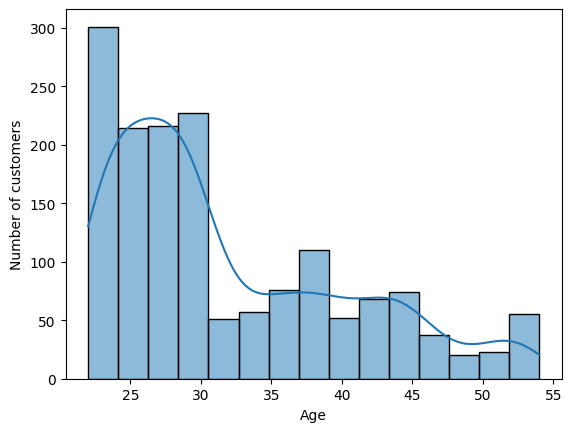

In [25]:
plt.ylabel('Number of customers')
sns.histplot(data=df, x='Age', kde=True);

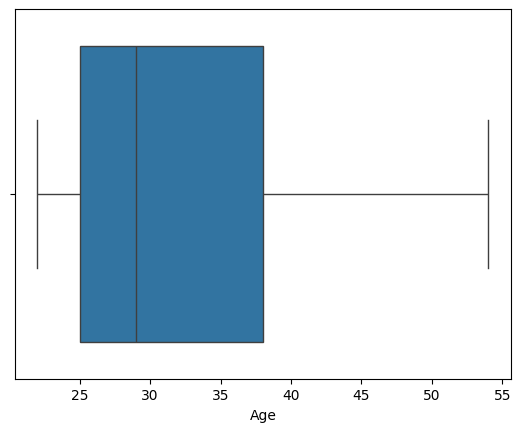

In [26]:
sns.boxplot(data=df, x='Age');

- 50% of the customers are young or middle aged, ags ranging from 25 years - 38 years
- A few customers have high ages causing the average age of customers to be greater than the median age of the customers

,proportion
Gender,
Male,79.190386
Female,20.809614


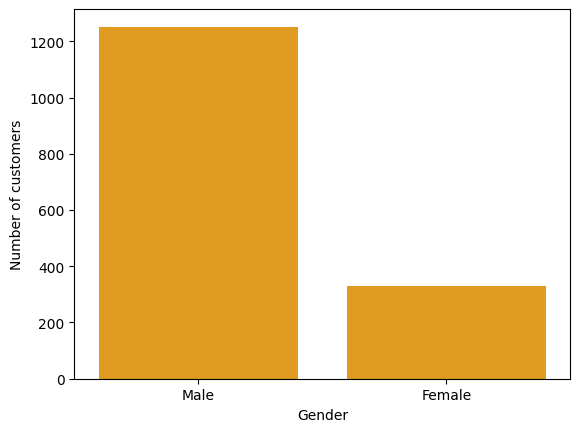

In [27]:
plt.ylabel('Number of customers')
sns.countplot(data=df, x='Gender', color='orange');
df['Gender'].value_counts(normalize=True)*100

- 79% of the customers are Male and only 21% Female customers

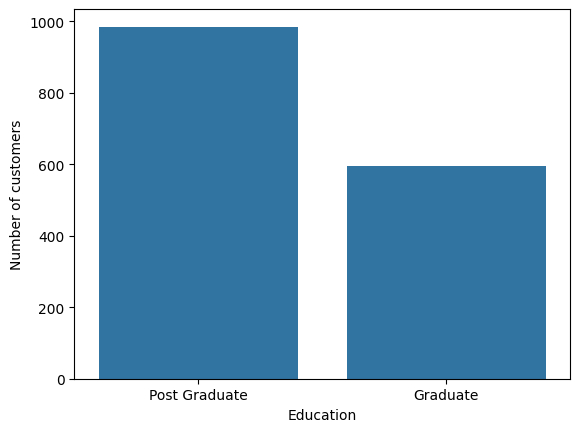

In [28]:
plt.ylabel('Number of customers')
sns.countplot(data=df, x='Education');

- Majority of the customers are post-graduates

,proportion
Marital_status,
Married,91.271347
Single,8.728653


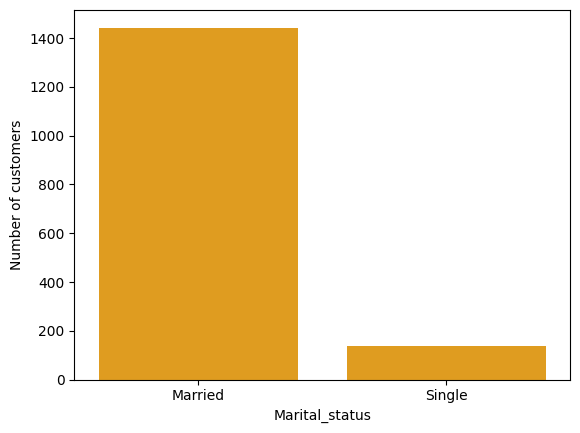

In [29]:
plt.ylabel('Number of customers')
sns.countplot(data=df, x='Marital_status', color='orange');
df['Marital_status'].value_counts(normalize=True)*100

- 91% of the customers are married, ie, demand of cars is higher among family-oriented customers

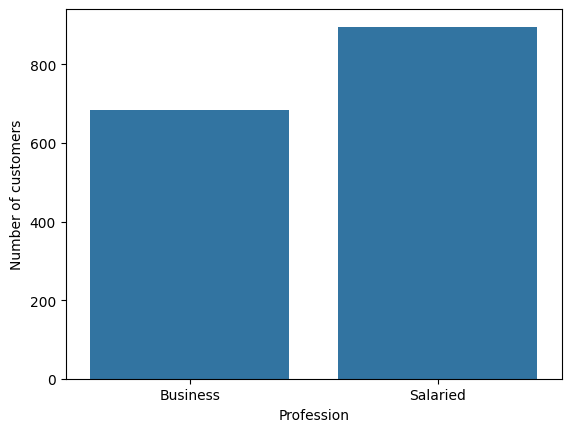

In [30]:
plt.ylabel('Number of customers')
sns.countplot(data=df, x='Profession');

- Majority customers are salaried rather than owning a business

,proportion
Partner_working,
Yes,54.901961
No,45.098039


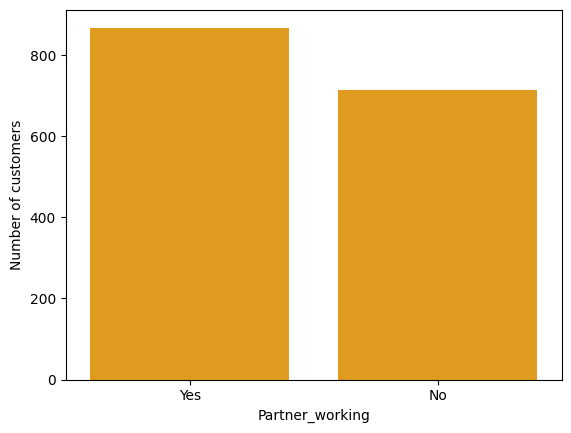

In [31]:
plt.ylabel('Number of customers')
sns.countplot(data=df, x='Partner_working', color='orange');
df['Partner_working'].value_counts(normalize=True)*100

- Approximately 55% of the married customer have working partners

,proportion
Personal_loan,
Yes,50.094877
No,49.905123


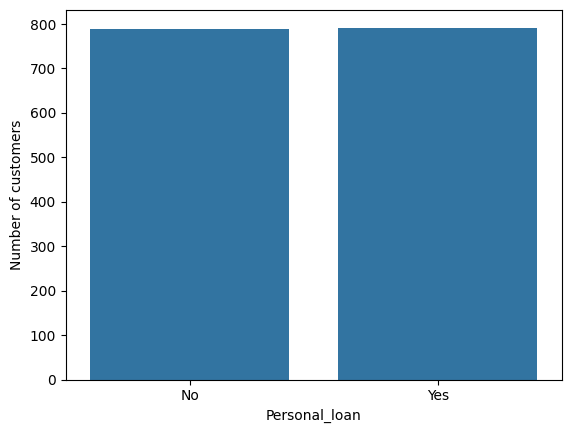

In [32]:
plt.ylabel('Number of customers')
sns.countplot(data=df, x='Personal_loan');
df['Personal_loan'].value_counts(normalize=True)*100

,proportion
House_loan,
No,66.666667
Yes,33.333333


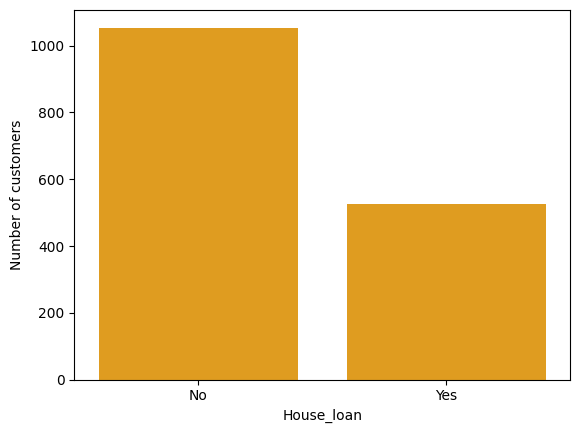

In [33]:
plt.ylabel('Number of customers')
sns.countplot(data=df, x='House_loan', color='orange');
df['House_loan'].value_counts(normalize=True)*100

- Personal Loan : Customers are evenly split(~50%) have personal loans, other 50% don't
- Home Loan : 66% of customers don't have home loan

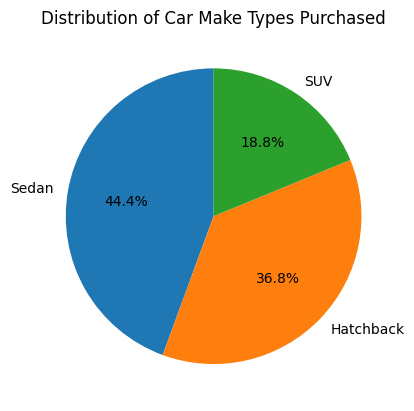

In [34]:
plt.pie(df['Make'].value_counts(normalize=True)*100, labels=['Sedan', 'Hatchback', 'SUV'], autopct='%.1f%%', startangle=90)
plt.title('Distribution of Car Make Types Purchased');

- Sedans are the most preffered, opted by 44.4% customers
- Hatchbacks are the second most popular, with 36.8% market share among the different car makes
- SUVs are the least purchased car types ~19%

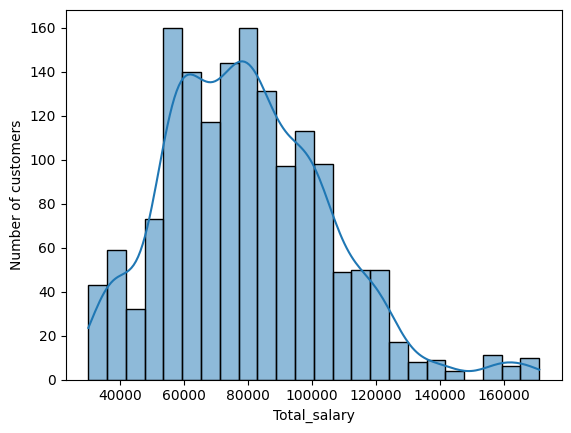

In [35]:
plt.ylabel('Number of customers')
sns.histplot(data=df, x='Total_salary', kde=True);

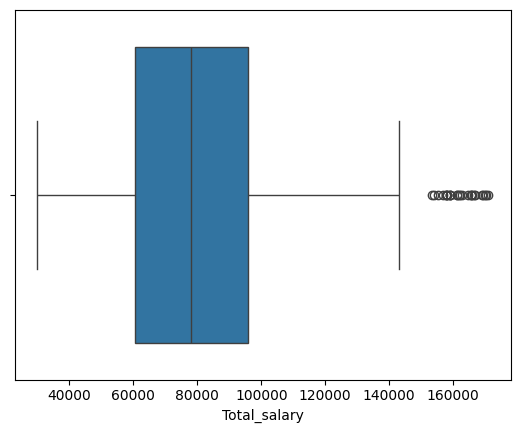

In [36]:
sns.boxplot(data=df, x='Total_salary');

- 50% of customers have incomes in the median salary range `$60000 - $100000`
- Few customers have very high total salary, causing outliers, thus the average total salary becomes greater than the median of the customer total salaries

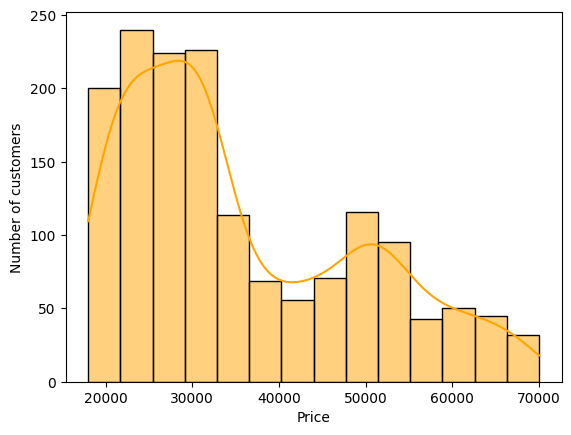

In [37]:
plt.ylabel('Number of customers')
sns.histplot(data=df, x='Price', color='orange', kde=True);

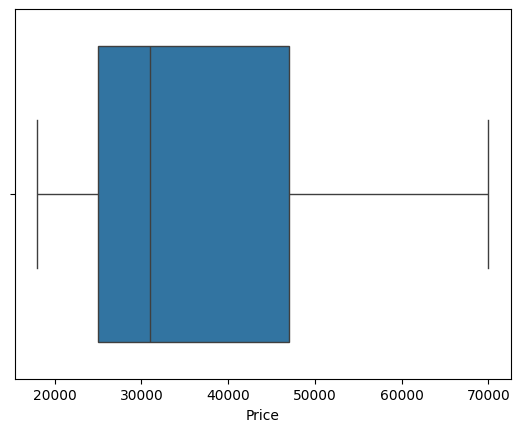

In [38]:
sns.boxplot(data=df, x='Price');

- 75% of the customers purchased cars in the lower to mid-price ranges, `$18000 - $47000`
- Few customers have bought expensive cars, causing the average price of car purchased to be greater than the median price of the purchased cars

# Bivariate Analysis

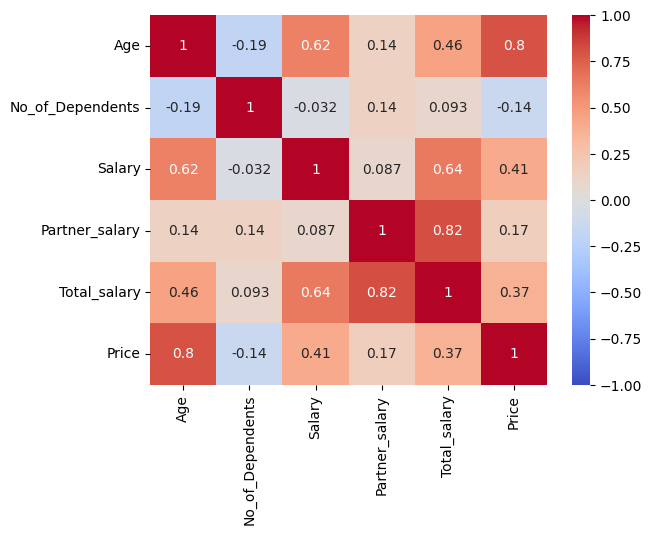

In [39]:
sns.heatmap(data = df.corr(numeric_only=True), annot=True, cmap='coolwarm', vmin=-1, vmax=1);

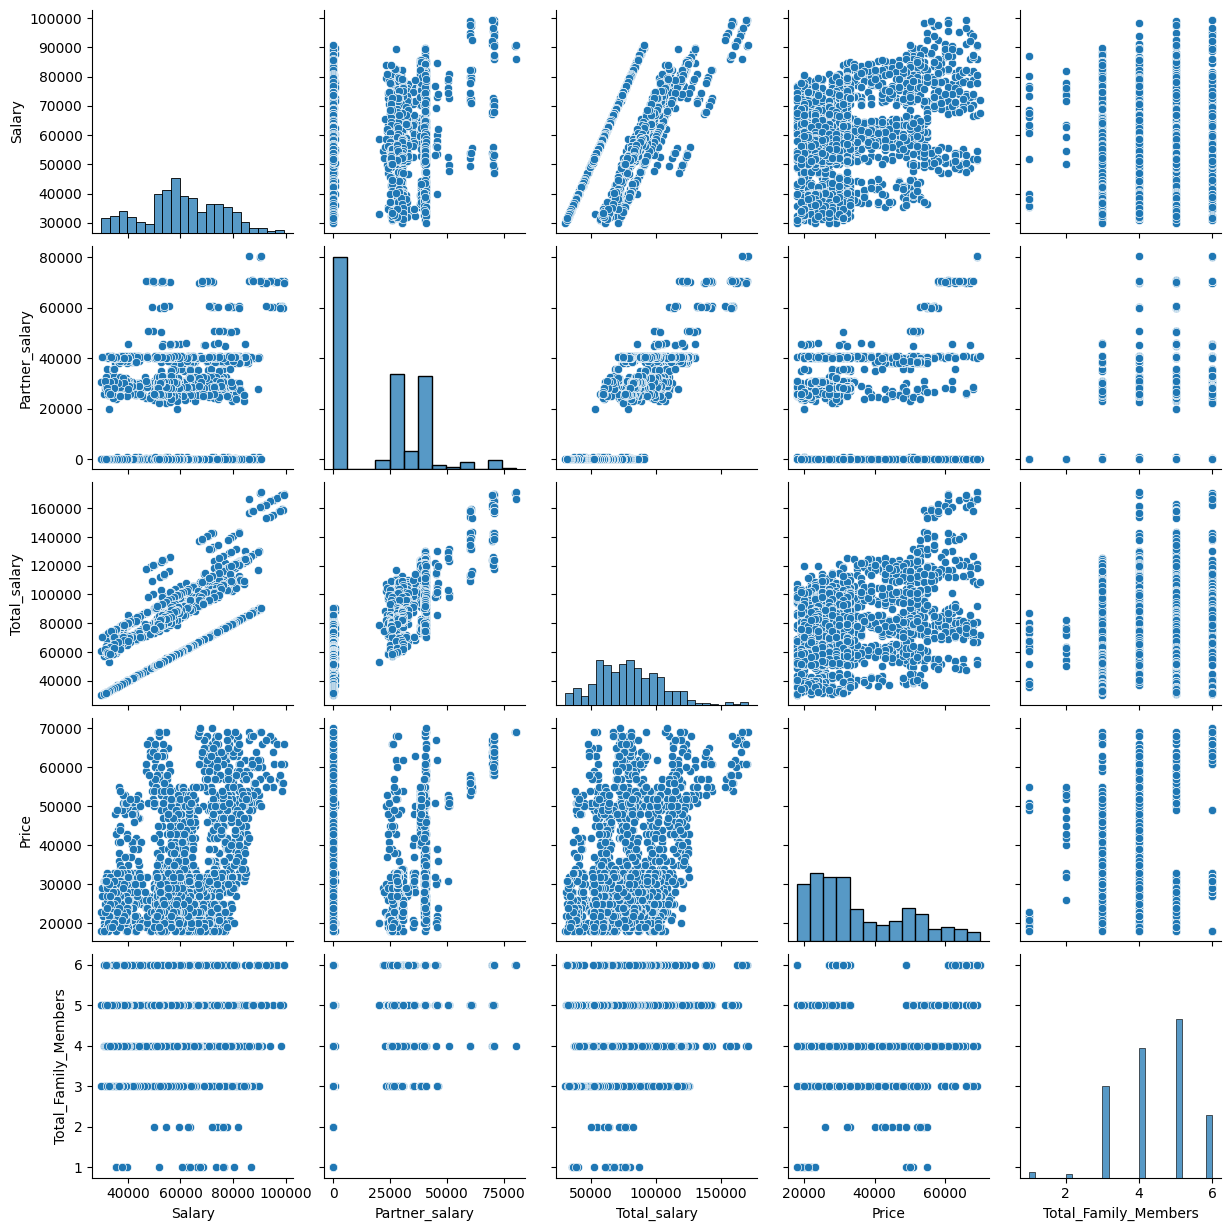

In [42]:
sns.pairplot(data=df[['Salary','Partner_salary', 'Total_salary','Price', 'Total_Family_Members']]);

**Market Condition : Car Make vs Price**

,count,mean,std,min,25%,50%,75%,max
Make,,,,,,,,
Hatchback,582.0,26474.226804,4290.467640,18000.0,23000.0,27000.0,30000.0,33000.0
SUV,297.0,55824.915825,9218.242714,31000.0,51000.0,57000.0,63000.0,70000.0
Sedan,702.0,34603.988604,11152.164304,18000.0,24000.0,33000.0,44000.0,55000.0


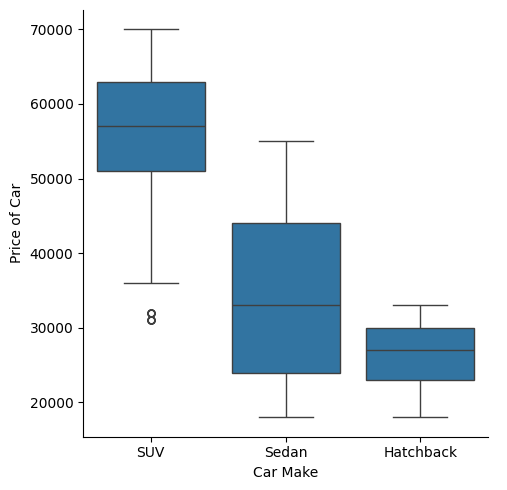

In [43]:
sns.catplot(data=df, x='Make', y='Price', kind='box')
plt.xlabel('Car Make')
plt.ylabel('Price of Car');
df.groupby('Make')['Price'].describe()

**Analyze how the total salary of the customer and the price of car bought is related**

<Figure size 2000x2000 with 0 Axes>

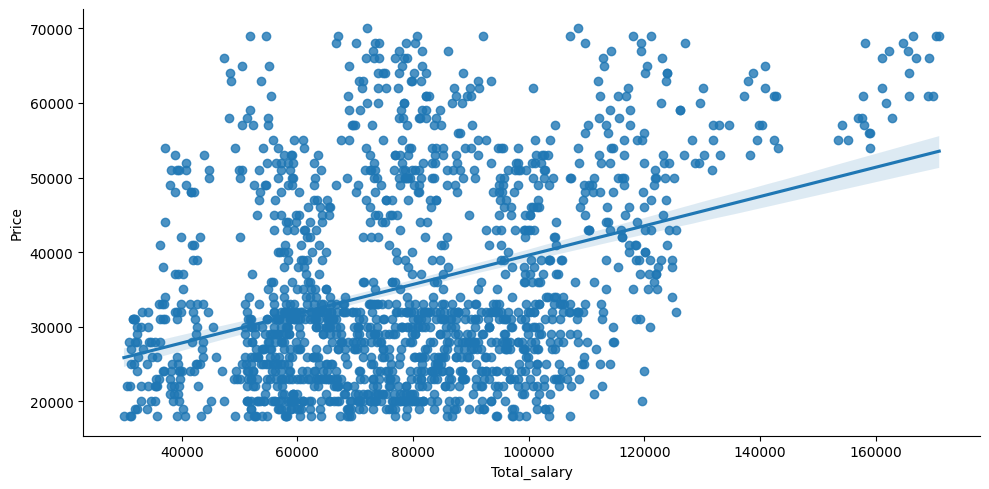

In [44]:
plt.figure(figsize=(20, 20))
sns.lmplot(data=df, x='Total_salary', y='Price', height=5, aspect=2);

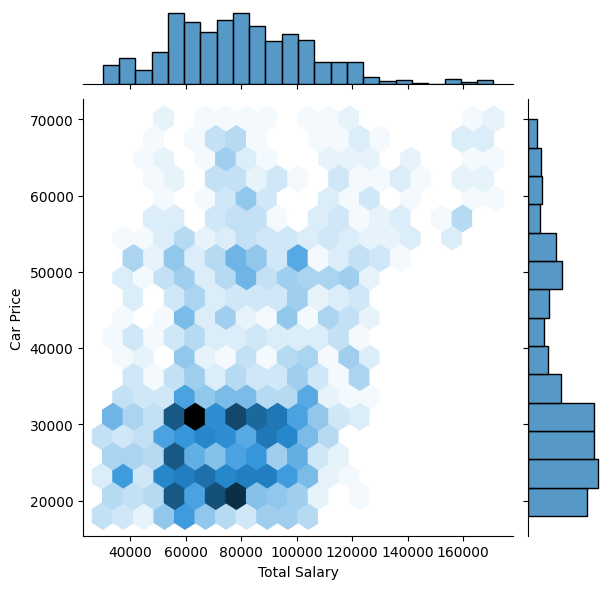

In [45]:
sns.jointplot(data=df, x='Total_salary', y='Price', kind='hex')
plt.xlabel('Total Salary')
plt.ylabel('Car Price');

- Price of the car purchased has a linear relation with the Total_Salary
- 50% of the car purchased are in the price range `$18000 - $35000`, mostly around the median price of 31000.0
- As outliers, Customers with high total salary have purchased expensive cars causing the mean price to be greater than the median price range


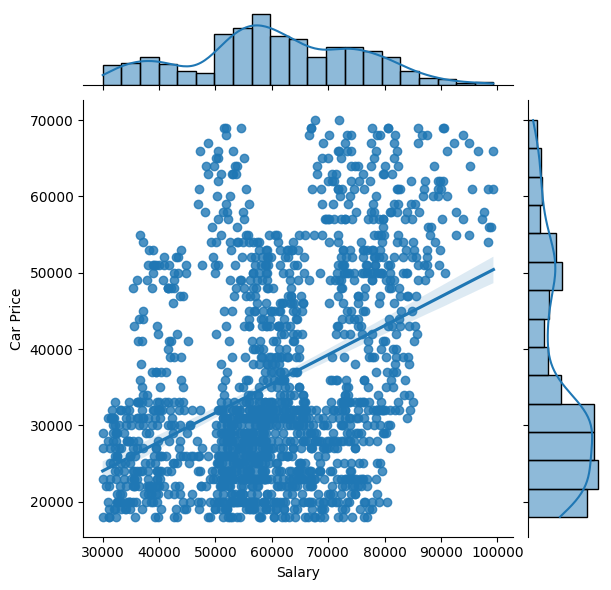

In [46]:
sns.jointplot(data=df, x='Salary', y='Price', kind='reg')
plt.xlabel('Salary')
plt.ylabel('Car Price');

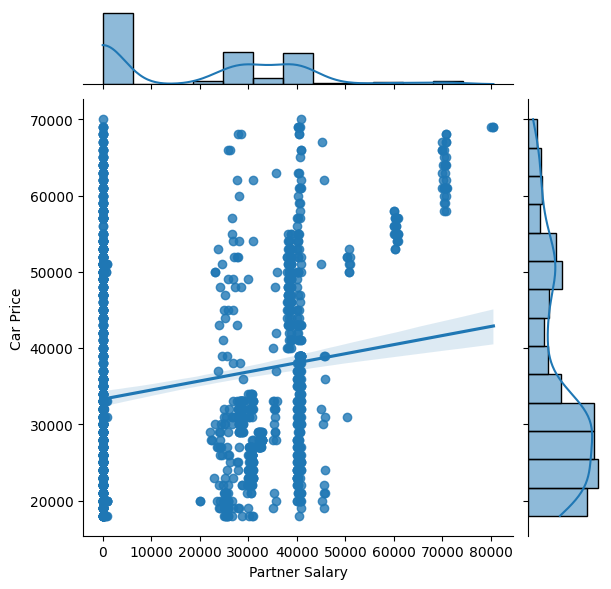

In [47]:
sns.jointplot(data=df, x='Partner_salary', y='Price', kind='reg')
plt.xlabel('Partner Salary')
plt.ylabel('Car Price');

-  Since, ` Total_Salary = Salary + Partner_salary `, the columns ` Salary ` and ` Partner_salary `, these columns also have positive linear co-relation to the car price
- Customers who are either single or whose partner is not earning, these kind of customers also buy cars within the median price range `$20000 - $35000`
- From the regression, slope of ` Partner_salary ` is gentler than slope of ` Salary `. `Salary` has a more dominant influence in Price of car purchased than the ` Partner_salary `

**Analyze Relation Between the Personal Loan of Customer and Price of Car purchased**

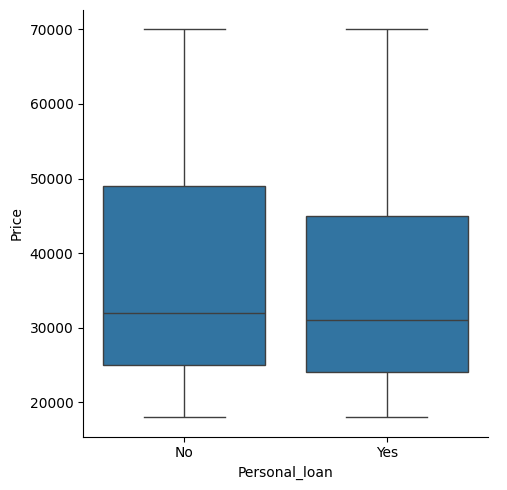

In [48]:
sns.catplot(data=df, x='Personal_loan', y='Price', kind='box');

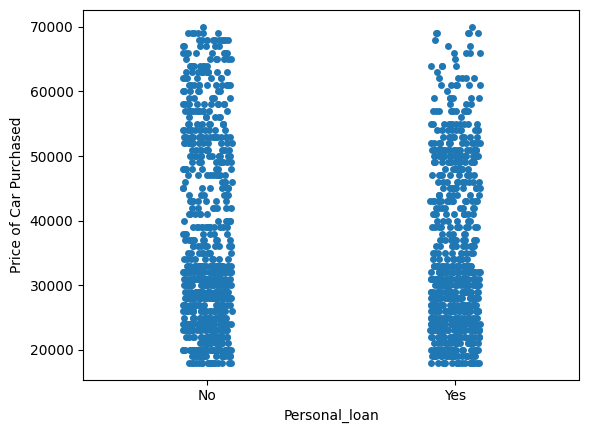

In [49]:
sns.stripplot(data=df, x='Personal_loan', y='Price', jitter=True)
plt.ylabel('Price of Car Purchased');

In [50]:
df.groupby('Personal_loan')['Price'].describe()

,count,mean,std,min,25%,50%,75%,max
Personal_loan,,,,,,,,
No,789.0,36742.712294,14534.344526,18000.0,25000.0,32000.0,49000.0,70000.0
Yes,792.0,34457.070707,12578.780338,18000.0,24000.0,31000.0,45000.0,70000.0


*Personal Loan vs Car Price*

- Majority of the customers irrespective of whether they have personal loan or not have bought cars in the median price range
- Median price of car purchased by customers with no personal loan is a bit higher than those with personal loan
- Range of car price also is higher for customers with no personal loan, 50% of price range between `$25000 - $49000`, while for customers with loan the 50% of the price range between `$24000 - $45000`

**Analyze Relation Between the Home Loan of Customer and Price of Car purchased**

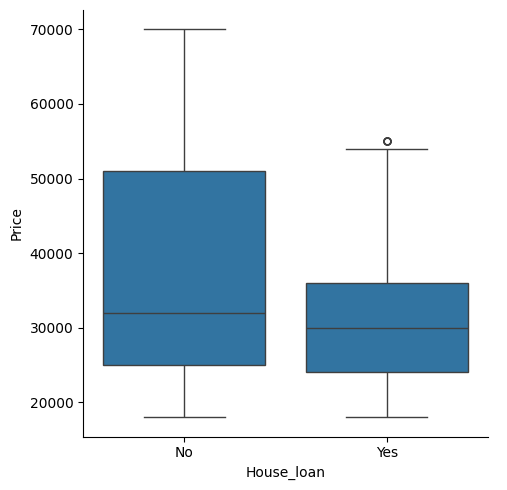

In [51]:
sns.catplot(data=df, x='House_loan', y='Price', kind='box');

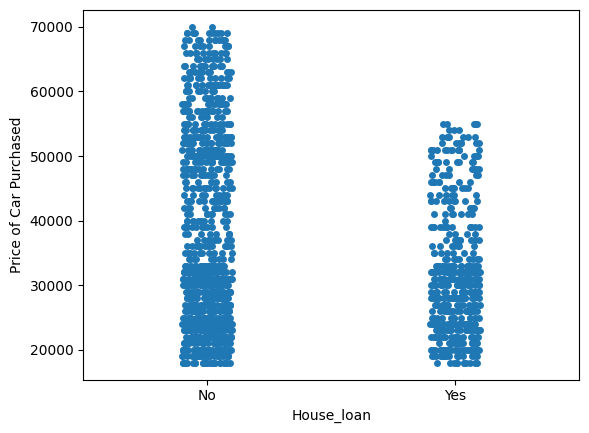

In [52]:
sns.stripplot(data=df, x='House_loan', y='Price', jitter=True)
plt.ylabel('Price of Car Purchased');

In [53]:
df.groupby('House_loan')['Price'].describe()

,count,mean,std,min,25%,50%,75%,max
House_loan,,,,,,,,
No,1054.0,37707.779886,14816.702037,18000.0,25000.0,32000.0,51000.0,70000.0
Yes,527.0,31377.609108,9596.008338,18000.0,24000.0,30000.0,36000.0,55000.0


*House Loan vs Car Price*

- Majority of the customers irrespective of whether they have house loan or not have bought cars in the median price range
- Median price of car purchased by customers with no house loan is a slightly higher than those with house loan
- Range of car price is also higher for customers with no house loan, 50% of price range between `$25000 - $51000`, while for customers with loan the 50% of the price range between `$24000 - $36000`


**Analyze how the presence of a partner and number of dependents affect the customer demand on the Car Make and Price of Car purchased**

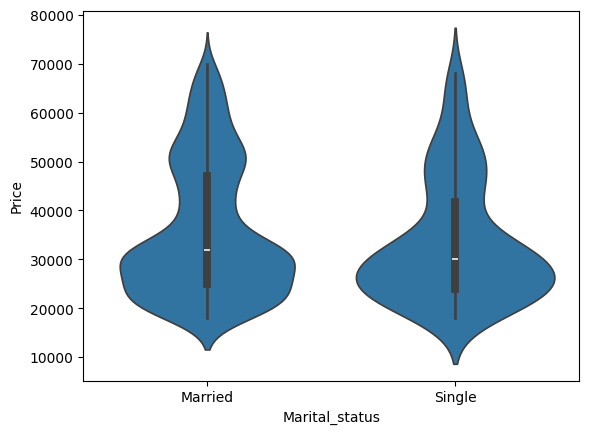

In [54]:
sns.violinplot(data=df, x='Marital_status', y='Price');

- Most customers irrespective of their marriage status purchase cars in the medium price range `$14000 - $40000`
- The median price is slightly higher for married customers than single customers
- The price is right-skewed for married customers indicating that the married customers purchase higher priced cars

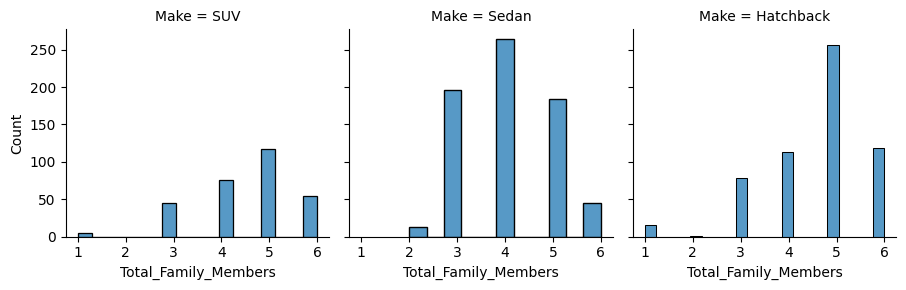

In [55]:
g = sns.FacetGrid(df, col='Make', col_wrap=4, height=3)
g.map(sns.histplot, 'Total_Family_Members');

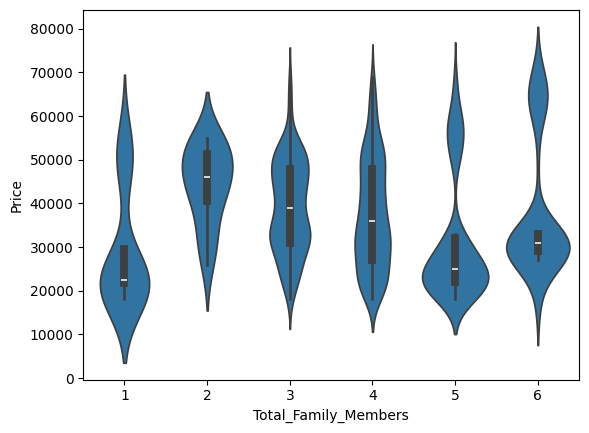

In [56]:
sns.violinplot(data=df, y='Price', x='Total_Family_Members');

- Sedan is the most popular car make among families with 3-5 members followed by Hatchback
- SUV is chosen relatively less, even by the customers having families of 6 memebers
- Majority of families with 1-6 members buy cars in medium price range, as the median Prices of the Cars purchased lie between `$20000 - $50000`

**Analyze Relation Between the Educational Qualification of Customer and the Make,Price of Car purchased**

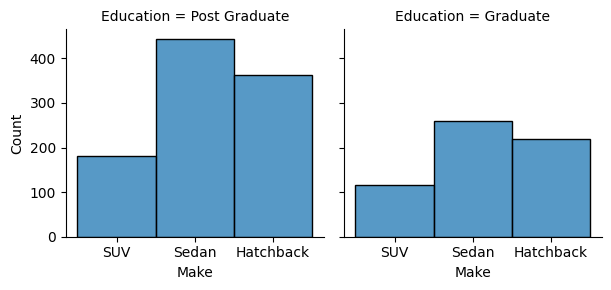

In [57]:
g = sns.FacetGrid(df, col='Education', col_wrap=3, height=3)
g.map(sns.histplot, 'Make');

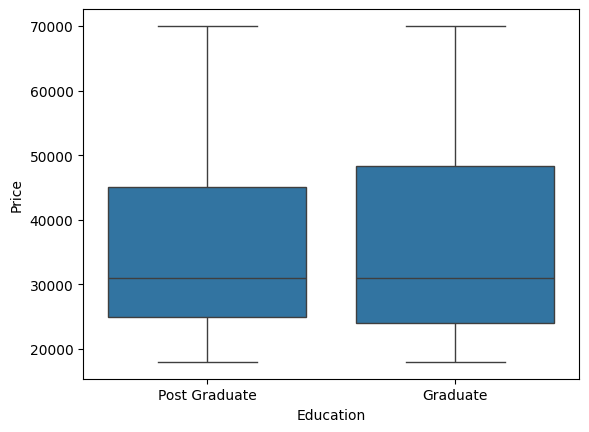

In [58]:
sns.boxplot(data=df, x='Education', y='Price');

- Customers with both graduate and post-graduate have similar median and price ranges.This means Education Qualification doesn't influence the Price of Car purchased
- Education doesn't affect the prefernces in car make either as Sedan is the most popular car type followed by Hatchback and SUV irrespective of the count

**Analyze Relation Between the Profession of Customer and  and the Make,Price of Car purchased**

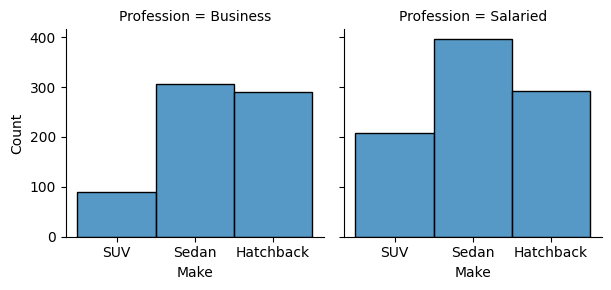

In [59]:
g = sns.FacetGrid(df, col='Profession', col_wrap=3, height=3)
g.map(sns.histplot, 'Make');

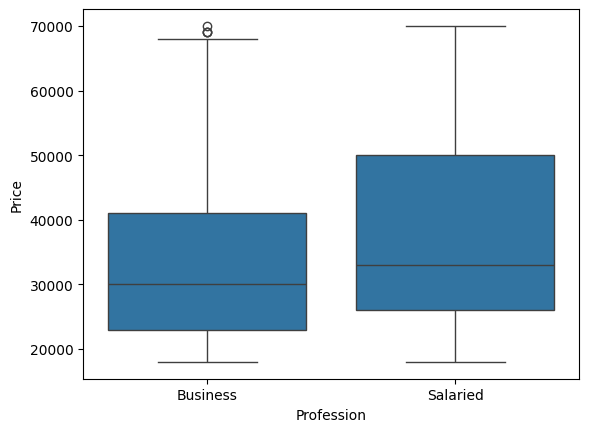

In [60]:
sns.boxplot(data=df, x='Profession', y='Price');

- Profession doesn't affect the prefernces in car make as Sedan is the most popular car type followed by Hatchback and SUV irrespective of the count
- Both professions have almost same median price.However, the Salaried customers exhibit greater price variability to buy high-priced cars
- There are outliers among Business customers

**Analyze Relation Between the Gender of Customer and  and the Make,Price of Car purchased**

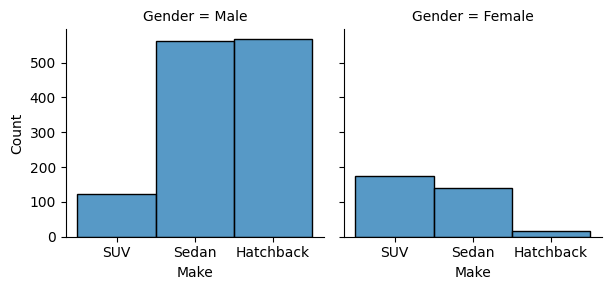

In [61]:
g = sns.FacetGrid(df, col='Gender', col_wrap=3, height=3)
g.map(sns.histplot, 'Make');

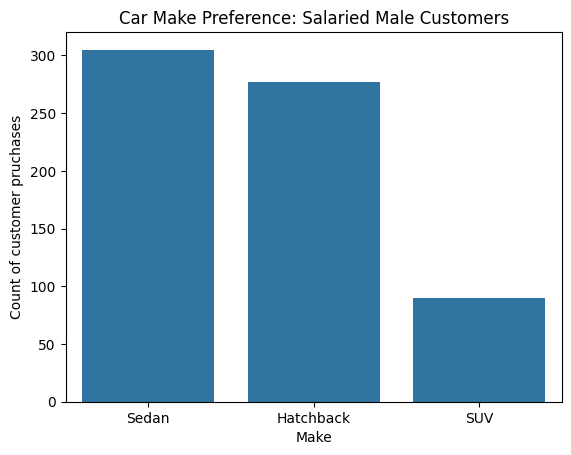

In [62]:
subset = df[(df['Gender'] == 'Male') & (df['Profession'] == 'Salaried')]
sns.countplot(data=subset, x='Make', order=['Sedan', 'Hatchback', 'SUV']);
plt.title('Car Make Preference: Salaried Male Customers')
plt.ylabel('Count of customer pruchases');

- Salaried Male customers have car make preference in the order : `Sedan > Hatchback > SUV`

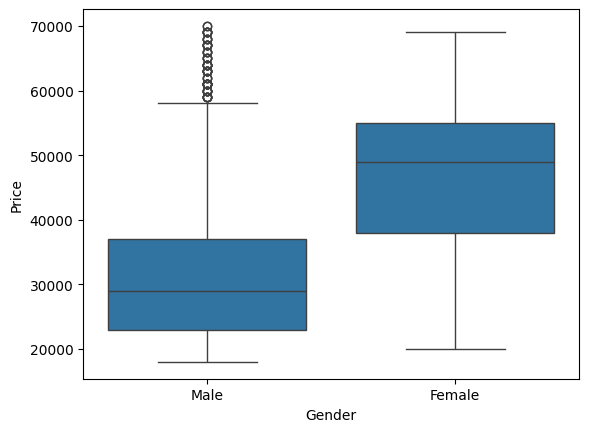

In [63]:
sns.boxplot(data=df, x='Gender', y='Price');

- Male customers mostly prefer Hatchback followed by Sedan.SUV has very less demand among male customers
- Salaried male customers prefer Sedan over Hatchbacks.SUVs have very less demand
- Female customers mostly prefer SUV and Sedan over Hatchback model
- The median price for female customers is higher than that for males
- 50% of male customers mostly buy cars in the medium price range `$25000 - $38000`.Some male customers buy cars of extremely high price causing right skewness
- 75% of Female customers buy cars of higher prices ranging between `$39000 - $55000`

**Analyze how the Age of Customer Affect Customer Demand of Make and Price of Car purchased**

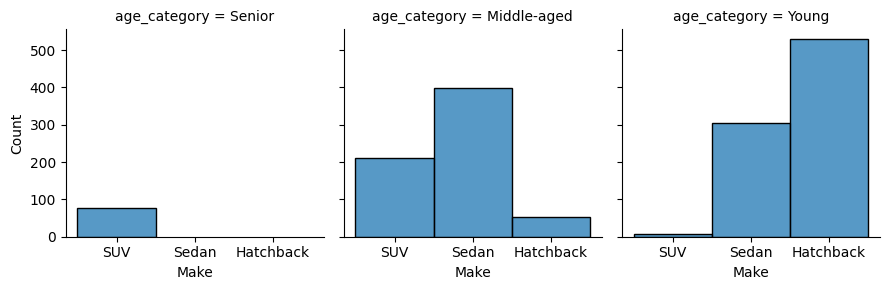

In [64]:
g = sns.FacetGrid(df, col='age_category', col_wrap=3, height=3)
g.map(sns.histplot, 'Make');

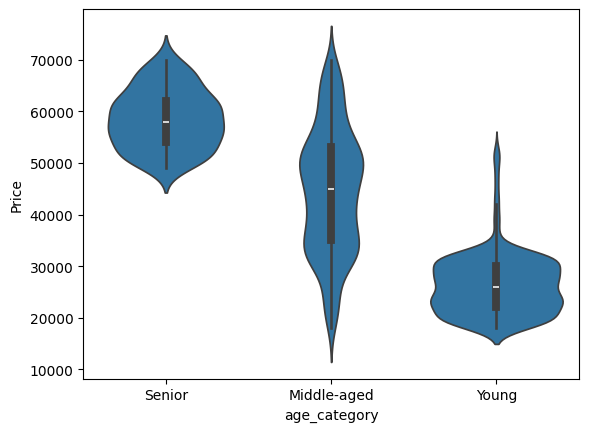

In [65]:
sns.violinplot(data=df, x='age_category', y='Price');

In [66]:
df.groupby('age_category')['Price'].describe()

,count,mean,std,min,25%,50%,75%,max
age_category,,,,,,,,
Middle-aged,662.0,44605.740181,12037.642560,18000.0,35000.0,45000.0,53000.0,70000.0
Senior,78.0,58525.641026,5653.924873,49000.0,54000.0,58000.0,62000.0,70000.0
Young,841.0,26380.499405,5903.009744,18000.0,22000.0,26000.0,30000.0,53000.0


- Young customers mostly prefer Hatchbacks followed by Sedan and SUV
- Middle-aged customers mostly prefer Sedan followed by SUV and Hatchback
- Senior customers only opt for SUVs
- 50% of Young customers purchase car in price range `$22000 - $30000`, however, some buy expensive cars causing many outliers
- Middle-aged customers exhibit greater variability in the price of car, nevertheless 50% of them buy cars in price `$35000 - $53000`
- Senior customers always purchase expensive cars only, sp price ranges from `$54000 - $62000`

# Handling Outliers

In [67]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1581.0,31.922201,8.425978,22.0,25.0,29.0,38.0,54.0
No_of_Dependents,1581.0,2.457938,0.943483,0.0,2.0,2.0,3.0,4.0
Salary,1581.0,60392.220114,14674.825044,30000.0,51900.0,59500.0,71800.0,99300.0
Partner_salary,1581.0,19233.776091,19670.391171,0.0,0.0,25100.0,38100.0,80500.0
Total_salary,1581.0,79625.996205,25545.857768,30000.0,60500.0,78000.0,95900.0,171000.0
Price,1581.0,35597.722960,13633.636545,18000.0,25000.0,31000.0,47000.0,70000.0
Total_Family_Members,1581.0,4.370651,1.057462,1.0,4.0,4.0,5.0,6.0


- Outliers present in :     
  - Partner_salary
  - Total_salary
- Since `Total_Salary = Salary + Partner_salary`, the outliers in partner_salary will automatically be reflected in Total Salary.
- So, we need to handle outliers in ` Total_Salary `

In [68]:
def treat_outliers(df, col):
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)

  IQR = Q3 - Q1

  lower_whisker = Q1 - 1.5*IQR
  upper_whisker = Q3 + 1.5*IQR

  df[col] = np.clip(df[col], lower_whisker, upper_whisker)
  return df


In [69]:
df = treat_outliers(df, 'Total_salary')

**Let's visualize numerical columns where outliers were treated**

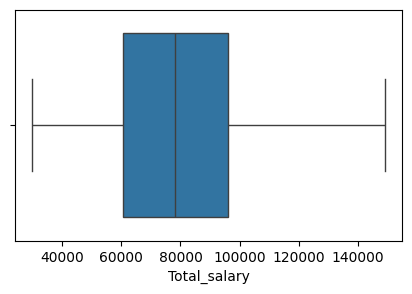

In [70]:
plt.figure(figsize=(5, 3))
sns.boxplot(data=df, x='Total_salary');

- All outliers have been treated

# Final Insights

**Current Austo Motor Company Products and Market Condition**

- Company specializes in ***`Sedan, SUV and Hatcback`*** car models
- Sedan model accounts for ( ~ 44%) of the cars purchased, followed by Hatchback model (~ 36%).SUVs are the least popular car model among the customers
- The price range of each car models :
  - Sedan : ` $18000 - $55000  `. Median price : **$33000**

  - Hatchback :  `$18000 - $33000`. Median price : **$27000**   

  - SUV : `$18000 - $70000`. Median price : **$57000**

**Customer Base**

- 95% of the customers include young and middle-aged
- 91% of the customers are married and among them about 54% of them have working partners, indicating dual-income households with greater purchase power
- 71% of the customers are males
- Personal loans are common, but fewer customers have taken House loans
- Majority of the customers have Total Salary in the medium range, but few have expectionally high income
- Customers are either graduates or post-graduates.Some are salaried while some have their businesses







**Customer Car Purchase Demands/Patterns**


**A**. **Based on Car Make**

- Customer Education (Graduate or Post Graduate) or Customer Profession (Business or Salaried) doesn't influence car make choice.
The common preference is : ` Sedan > Hatchback > SUV `
- Families with 3-5 members prefer Sedan as first choice then Hatchbacks.SUVs are rarely opted, even by 6 member family
- Male customers prefer Hatchbacks, then Sedans. SUVs are least popular
- Female customers opt for SUVs and Sedans, with lower preference for Hatchbacks.
- Age Groups :
  - Young (< 31 yrs): Prefer Hatchbacks, then Sedans.
  - Middle-aged (31 - 45 yrs): Prefer Sedans, then SUVs.
  - Senior (> 45 yrs): Prefer SUVs exclusively.


**B.** **Based on Car Prices**

- Most people buy cars priced between `$18000 and $47000`, with a few buying very costly ones.
- Higher income means buying more expensive cars, and personal salary influences the car's price more than partner's salary
- People without loans usually spend more on cars than those who have loans
- Married people tend to buy higher-priced cars than single people
- Women usually buy more expensive cars than men
- Older people buy the most expensive cars, middle-aged spend mid-range, and young buyers spend the least





